<H1>Лабораторная работа №1</H1>

<H3>Ким Д.А. 5130901/10201</H3>

<H3>Упражнение 1.2</H3>
Скачаем с сайта freesound.org человеческую речь.

In [1]:
import thinkdsp
from IPython.display import Audio
wave = thinkdsp.read_wave("sounds/white.wav")
wave.make_audio()

Посмотрим как выглядит график частоты

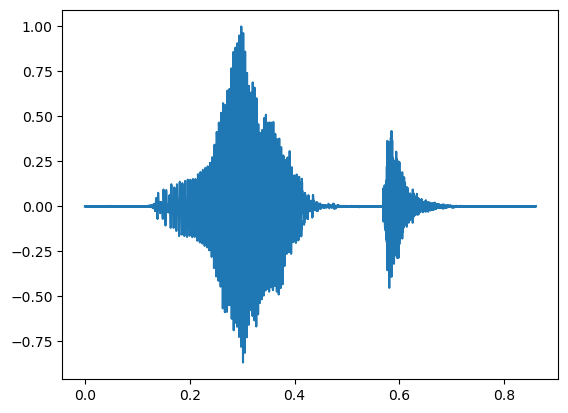

In [2]:
wave.plot()

Выделим кусок с 0.2 до 0.4 секунд в котором частота на пике.

In [3]:
wave = wave.segment(start=0.2, duration=0.3)
wave.make_audio()

Вычислим спектр этого сегмента.

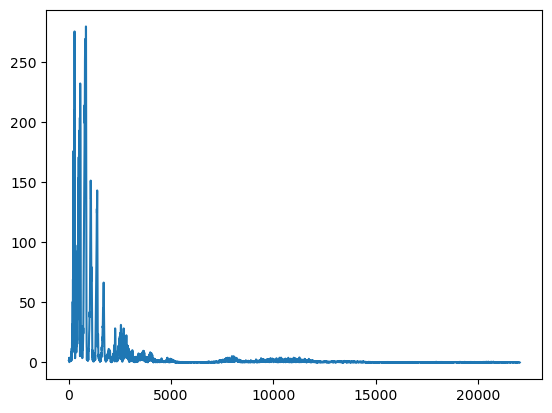

In [4]:
spectrum = wave.make_spectrum()
spectrum.plot()
spectrum.low_pass(cutoff=100, factor=0.1)
spectrum.band_stop(low_cutoff=6000, high_cutoff=7000, factor=0.7)
spectrum.high_pass(cutoff=10000, factor=0.1)
newWave = spectrum.make_wave()


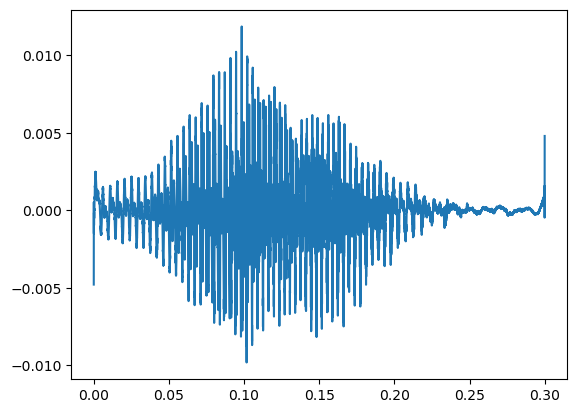

In [5]:
newWave.plot()
newWave.make_audio()

Звук перетерпел изменения. Стал более  приглушенным, так как фактор некоторых частот стоит всего на 10%, также появились шумы вначале и в конце связанные с пригушением высоких частот.

<H3>Упражнение 1.3</H3>

Созддаим сигнал суммированием синусоидального и косинусоидальных сигналов, затем преобразуем этот сигнал в звуковую волну.

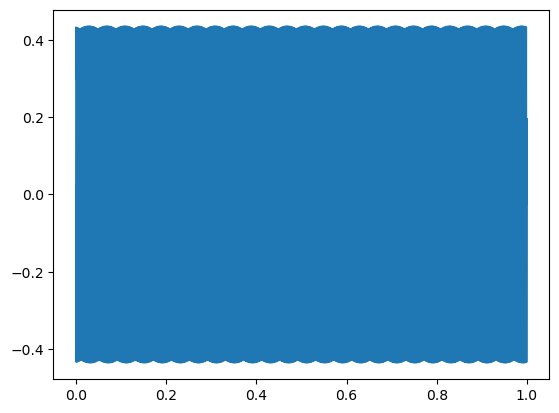

In [6]:
cos=thinkdsp.CosSignal(freq=440, amp=0.3, offset=0)
sin=thinkdsp.SinSignal(freq=880, amp=0.2, offset=0)
signal = sin+cos
trig_wave=signal.make_wave()
trig_wave.plot()
trig_wave.make_audio()

Теперь посмотрим на получившийся спектр.

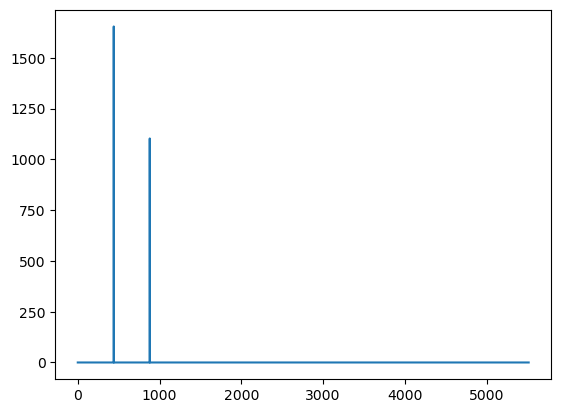

In [7]:
trig_spectrum = trig_wave.make_spectrum()
trig_spectrum.plot()

Как мы видим он состоит только из частот в 440Гц и 880Гц. Теперь посмотрим, что произоудет со звуком при добавлении частотных компонент не кратных основным.

In [8]:
sig = thinkdsp.CosSignal(freq=90, amp=0.1, offset=0)
newSignal = signal+sig
trig_wave_2 = newSignal.make_wave()
trig_wave_2.make_audio()

Как можно услышать, вдобавок к уже исходному сигнал добавился другой. Но он не резонирует с ними и на их фоне сильно выделяется. Кажется будто поверх сигнала теперь наложен шум, отсутсвует мелодичность.

<H3>Упражнение 1.4</H3>

Создадим функцию stretch, которая получает коэффицент и волну на вход и на выходе выдает замедленный/ускоренный звук. Работать она будет путем изменения ts и framerate в wave. Протестируем эту функцию на звуке, который мы брали в первом пункте.

In [9]:
def stretch(w, coef):
    w.ts *= coef
    w.framerate /= coef

In [10]:
fastWave = thinkdsp.read_wave("sounds/white.wav")
slowWave = thinkdsp.read_wave("sounds/white.wav")
stretch(fastWave, 2.0)
stretch(slowWave, 0.5)
wave.make_audio()

In [11]:
fastWave.make_audio()

In [12]:
slowWave.make_audio()